In [41]:
import numpy as np
import pandas as pd

In [42]:
#Visualisation Library
import seaborn as sns
import matplotlib.pyplot as plt

#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

#Classification model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Classification model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#To split the model into training and testing data
from sklearn.model_selection import train_test_split

#Different model improvement packages
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Evaluation metrics
from sklearn import metrics

In [43]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [45]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
train["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: title={'center': 'Pclass'}, xlabel='Parch'>

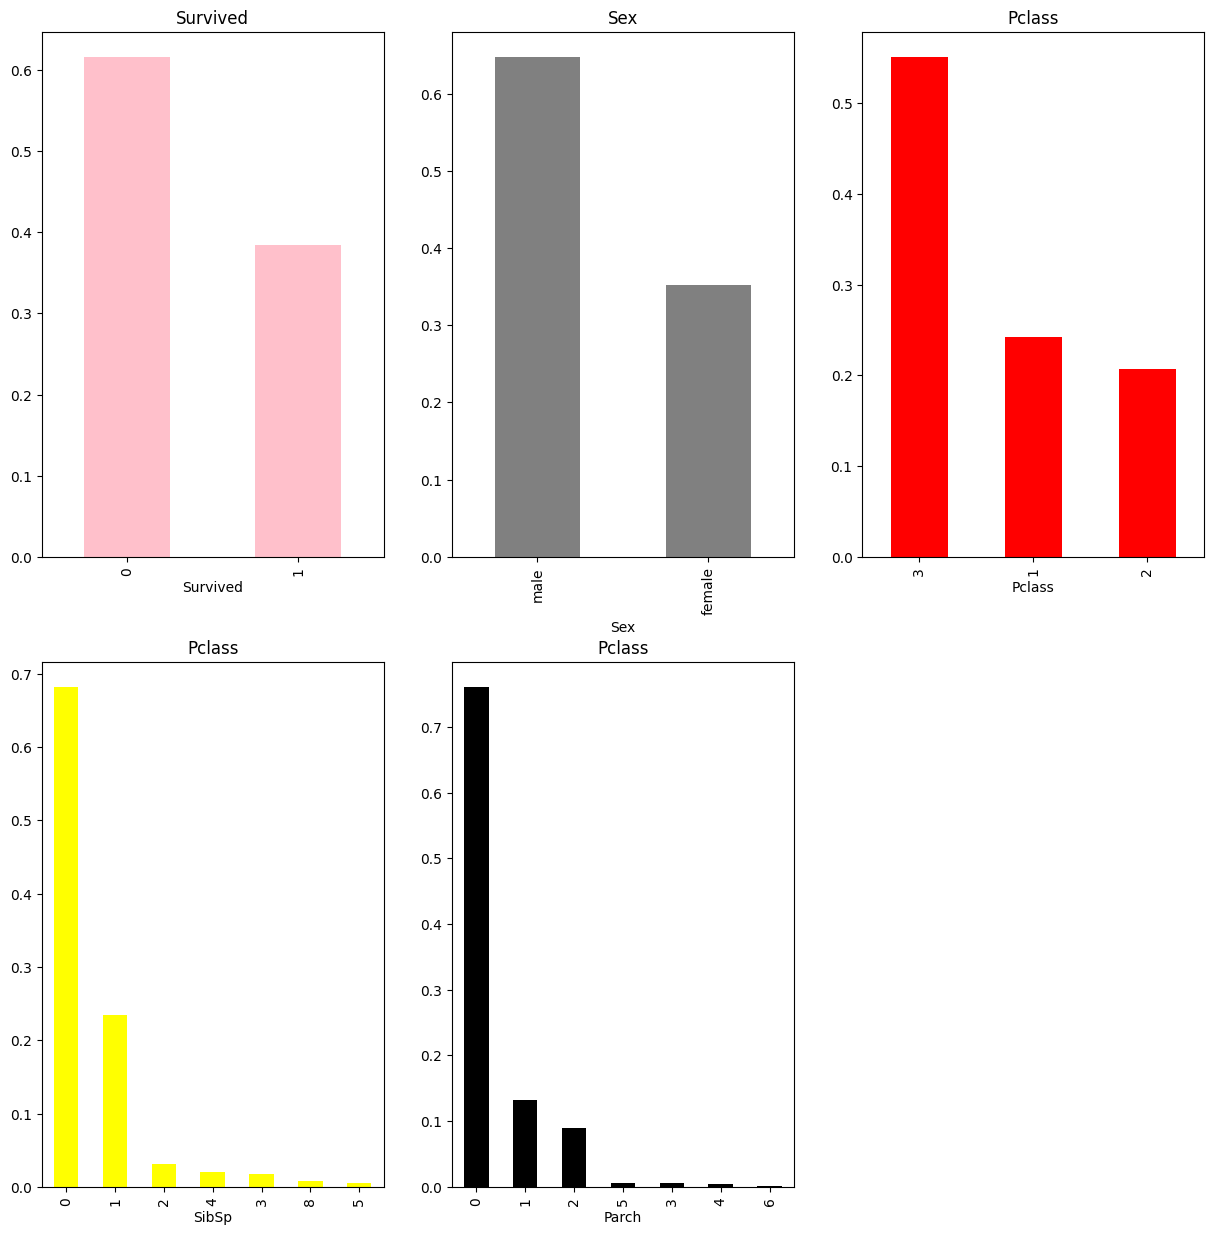

In [48]:
plt.figure(1) 
plt.subplot(2,3,1)
train['Survived'].value_counts(normalize=True).plot.bar(figsize=(15,15),title='Survived',color='pink')
plt.subplot(2,3,2)
train['Sex'].value_counts(normalize=True).plot.bar(figsize=(15,15),title='Sex',color='grey')
plt.subplot(2,3,3)
train['Pclass'].value_counts(normalize=True).plot.bar(figsize=(15,15),title='Pclass',color='red')
plt.subplot(2,3,4)
train['SibSp'].value_counts(normalize=True).plot.bar(figsize=(15,15),title='Pclass',color='yellow')
plt.subplot(2,3,5)
train['Parch'].value_counts(normalize=True).plot.bar(figsize=(15,15),title='Pclass',color='black')

<Axes: xlabel='Parch'>

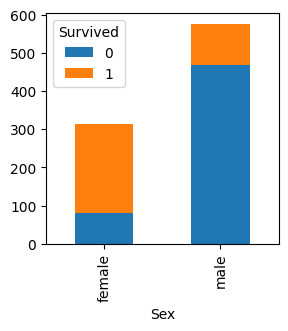

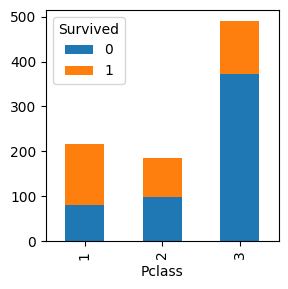

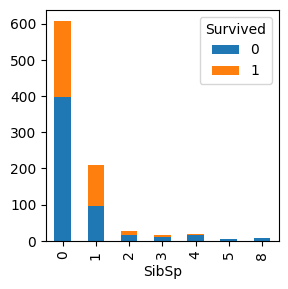

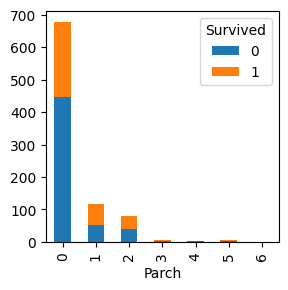

In [49]:
gender=pd.crosstab(train['Sex'],train['Survived'])
gender.plot(kind='bar',stacked=True,figsize=(3,3))

PClass=pd.crosstab(train['Pclass'],train['Survived'])
PClass.plot(kind='bar',stacked=True,figsize=(3,3))

SibSp=pd.crosstab(train['SibSp'],train['Survived'])
SibSp.plot(kind='bar',stacked=True,figsize=(3,3))

Parch=pd.crosstab(train['Parch'],train['Survived'])
Parch.plot(kind='bar',stacked=True,figsize=(3,3))

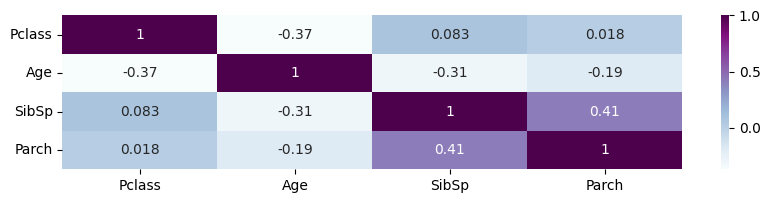

In [50]:
plt.figure(figsize=(10,2))
sns.heatmap(train[['Pclass','Age','SibSp'
                   ,'Parch']].corr(),cmap='BuPu',annot=True)
plt.show()

In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
numeric_col= train.select_dtypes([int,float]).columns
object_col= train.select_dtypes([object]).columns
print('object columns: ', object_col)
print('numeric columns:' , numeric_col)

object columns:  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
numeric columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [53]:
# 使用平均值填充缺失值
for i in train[numeric_col]:
    print(i,':' ,round(train[i].mean(),2))
    train[i].fillna(round(train[i].mean(),2),inplace=True)

PassengerId : 446.0
Survived : 0.38
Pclass : 2.31
Age : 29.7
SibSp : 0.52
Parch : 0.38
Fare : 32.2


In [54]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# 使用众数填充缺失值
for i in train[object_col]:
    print(i,':', train[i].mode()[0])
    train[i].fillna(train[i].mode()[0],inplace=True)

Name : Abbing, Mr. Anthony
Sex : male
Ticket : 1601
Cabin : B96 B98
Embarked : S


In [56]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [57]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
features = ["Pclass", "Sex", "SibSp", "Parch",'Survived']
train=pd.get_dummies(train[features])
train.head()

,Pclass,SibSp,Parch,Survived,Sex_female,Sex_male
0,3,1,0,0,False,True
1,1,1,0,1,True,False
2,3,0,0,1,True,False
3,1,1,0,1,True,False
4,3,0,0,0,False,True


In [62]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [66]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [67]:
print(accuracy_score(y_test,predictions))

0.8171641791044776


In [69]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
test=pd.get_dummies(test[features])
test.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,0,0,False,True
1,3,1,0,True,False
2,2,0,0,False,True
3,3,0,0,False,True
4,3,1,1,True,False


In [70]:
predictions = model.predict(test)

In [75]:
test = pd.read_csv('test.csv')

In [76]:
output = pd.DataFrame({'PassengerId':   test.PassengerId, 'Survived': predictions})
output.to_csv('submission2.csv', index=False)